In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set(style="darkgrid")

In [2]:
df = pd.read_csv('data/2018/fakeWhatsApp.BR_2018.csv')
df.columns

C:\Users\lucas.carneiro\Anaconda3\envs\env\lib\site-packages\IPython\core\interactiveshell.py:3146: DtypeWarning: Columns (4,7) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


Index(['id', 'date', 'hour', 'timestamp', 'ddi', 'country', 'country_iso3',
       'ddd', 'state', 'group', 'midia', 'url', 'characters', 'words', 'types',
       'viral', 'shares', 'text', 'misinformation'],
      dtype='object')

In [3]:
def custom_time(data,hora):
    string = data + " " + hora
    return string
df['timestamp'] = df.apply(lambda x: custom_time(x['date'],x['hour']),axis=1)

In [4]:
df[['id','timestamp','ddi','ddd', 'country','state','group','midia','shares','viral','text']].sample(10)

,id,timestamp,ddi,ddd,country,state,group,midia,shares,viral,text
207792,-948137768871056857,22/08/18 11:57,55,61,BRASIL,Distrito Federal,2018_54,1,1,0,<Arquivo de mídia oculto>
40130,7969509117884777276,08/09/18 20:14,1,(941),ESTADOS UNIDOS,Estrangeiro,2018_9,0,1,0,https://www.facebook.com/elcimarm?__xts__%5B0%...
206231,7877967108007041358,10/08/18 05:45,55,98,BRASIL,Maranhão,2018_54,0,4,1,*—ACDP/CURSOS—*\n\n_*Seja um(a) Detetive Profi...
208921,-948137768871056857,25/08/18 21:01,55,61,BRASIL,Distrito Federal,2018_54,1,1,0,<Arquivo de mídia oculto>
233820,5428835759879898822,02/09/18 12:13,55,63,BRASIL,Tocantins,2018_56,0,7,1,*Lista do Facebook*\n\nTenho página pessoal no...
20937,1808263345512202329,03/09/18 19:29,55,48,BRASIL,Santa Catarina,2018_6,1,1,0,<Arquivo de mídia oculto>
243545,7845558121315375118,12/09/18 20:22,55,92,BRASIL,Amazonas,2018_57,1,1,0,<Arquivo de mídia oculto>
250078,-5305041620534610853,07/10/18 11:30,55,92,BRASIL,Amazonas,2018_57,0,1,0,Pode sim amigo!
18463,8645106566420467123,10/08/18 10:27,55,93,BRASIL,Pará,2018_6,0,1,0,"Olha a situação da Venezuela, provavelmente o ..."
142662,-5946910997972065942,07/10/18 17:50,55,73,BRASIL,Bahia,2018_39,0,1,0,O vei


In [5]:
len(df[df['viral']==1]['text'].unique())

5284

In [6]:
a = df[df['misinformation']==1].sample(3)['text']
for i in list(a):
    print(i)
    print('----------------------------------------')

Amoedo - Itaú - Metacapitalistas (George Soros)

No governo Sarney, após o governo militar, inicia-se o plano de privatizaçao das empresas estatais brasileiras, sob o comando de Fernao Bracher, diretor do Banco Central(BC) à época.18 grandes estatais foram privatizadas. Bracher após sair do governo dá inicio a formaçao de seu próprio banco (BBA), tendo Joao Amoedo na equipe (q anos depois se tornou diretor presidente da instituiçao). 
Em 1990, no governo Collor, é criada a lei que institui oficialmente o Programa Nacional de Desestatizaçoes. Em 1991, Armínio Fraga assume a Diretoria de Operaçoes Internacionais do BC (onde fica até ser contratado em 1993 para a direçao do Fundo de Investimento de George Soros nos EUA). 
No ano de 1991 somente o BBA foi autorizado pelo BC a abrir uma filial nas Bahamas para coordenar a formaçao de um Consórcio de bancos e investidores nacionais e internacionais que iriam investir na compra das estatais brasileiras. Em 1992 o processo é atrasado pois se d

In [7]:
a = df[df['misinformation']==-1].sample(5)['text']
for i in list(a):
    print(i)
    print('----------------------------------------')

<Arquivo de mídia oculto>
----------------------------------------
<Arquivo de mídia oculto>
----------------------------------------
<Arquivo de mídia oculto>
----------------------------------------
<Arquivo de mídia oculto>
----------------------------------------
<Arquivo de mídia oculto>
----------------------------------------


In [8]:
a = df[(df['misinformation']==-1) & (df['midia']==0)].sample(5)['text']
for i in list(a):
    print(i)
    print('----------------------------------------')

Logicamente eu tirei de imediato!
----------------------------------------
tá avisando q vai ter roubo, só Deus na causa
----------------------------------------
Nenhum candidato à presidência está tendo tanto apoio popular ... olha só hoje a tarde em Presidente Prudente... reduto do Alckmin
----------------------------------------
A VERDADE VAI VENCER A mentira.
----------------------------------------
Maranhão da pena de ver esse estado na situação q se encontra....mas se for olhar quem Sempre se elegeu por lá. Tenebroso
----------------------------------------


In [9]:
def haveWord(word,text):
    word = word.lower()
    text = str(text).lower()
    if word in text:
        return True
    else:
        return False
    
df_query = df[df.apply(lambda x: haveWord('ptralha',x['text']),axis=1)]

In [10]:
df_query = df[df.apply(lambda x: haveWord('Ninguém vai perguntar pelos 14 milhões de petistas',x['text']),axis=1)]
for p in df_query['text'].unique():
    print(p)
    print('---------------------------')

Bolsonaro e Mourão  estão numa pizzaria jantando.
Um cliente aproxima-se deles e pergunta:
- Sobre o que estão conversando de forma tão animada?
- Estamos fazendo planos para resolver o problema do Brasil de forma rápida e super discreta....responde Bolsonaro...
- Uau!, exclama o cliente...
E quais são esses planos?
- No Brasil, vamos matar 14 milhões de petistas, um São Paulino e um vascaino, responde Mourão.
O convidado parece confuso e pergunta:
- Um... São Paulino e um vascaíno?
Por que é que vão matar um São Paulino e um vascaíno?
Bolsonaro dá uma palmada nas costas do Mourão e exclama:
- Não te disse?
Ninguém vai perguntar pelos 14 milhões de petistas!
---------------------------
kkkkk kkkkkkk😂😂😂😂😂😂

Trump e Teresa May estão num jantar na Casa Branca.
Um dos convidados aproxima-se deles e pergunta:
- Sobre o que estão conversando de forma tão animada?
- Estamos fazendo planos para a "Terceira Guerra Mundial", diz Trump.
- Uau!, exclama o convidado.
E quais são esses planos?
- No 

# Bigrams

In [11]:
import utils
import emoji
import regex
import string
from sklearn.feature_extraction.text import CountVectorizer

C:\Users\lucas.carneiro\Anaconda3\envs\env\lib\site-packages\gensim\similarities\__init__.py:15: UserWarning: The gensim.similarities.levenshtein submodule is disabled, because the optional Levenshtein package <https://pypi.org/project/python-Levenshtein/> is unavailable. Install Levenhstein (e.g. `pip install python-Levenshtein`) to suppress this warning.
  warnings.warn(msg)


In [12]:
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [13]:
emoji.UNICODE_EMOJI['pt']

{'😀': ':rosto_risonho:',
 '😃': ':rosto_risonho_com_olhos_bem_abertos:',
 '😄': ':rosto_risonho_com_olhos_sorridentes:',
 '😁': ':rosto_contente_com_olhos_sorridentes:',
 '😆': ':rosto_risonho_com_olhos_semicerrados:',
 '😅': ':rosto_risonho_com_gota_de_suor:',
 '🤣': ':rolando_no_chão_de_rir:',
 '😂': ':rosto_chorando_de_rir:',
 '🙂': ':rosto_levemente_sorridente:',
 '🙃': ':rosto_de_cabeça_para_baixo:',
 '😉': ':rosto_com_olho_piscando:',
 '😊': ':rosto_sorridente_com_olhos_sorridentes:',
 '😇': ':rosto_sorridente_com_auréola:',
 '🥰': ':rosto_sorridente_com_3_corações:',
 '😍': ':rosto_sorridente_com_olhos_de_coração:',
 '🤩': ':rosto_com_olhar_maravilhado:',
 '😘': ':rosto_mandando_um_beijo:',
 '😗': ':rosto_beijando:',
 '☺️': ':rosto_sorridente:',
 '😚': ':rosto_beijando_com_olhos_fechados:',
 '😙': ':rosto_beijando_com_olhos_sorridentes:',
 '\U0001f972': ':rosto_sorridente_com_lágrima:',
 '😋': ':rosto_saboreando_comida:',
 '😛': ':rosto_mostrando_a_língua:',
 '😜': ':rosto_piscando_e_com_língua_para_

In [14]:
def custom_preprocess(text):
    text = text.lower()    
    for c in text:
        if c in string.punctuation:
            text = text.replace(c,'')
        if c in emoji.UNICODE_EMOJI['pt']:
            text = text.replace(c, ' ' + c + ' ')
    text = utils.removeStopwords(text)
    text = emoji.demojize(text, language = 'pt')
    return text     
        

def get_top_n_ngrams(corpus, ngram = (1,1), n=None):
    if type(corpus) == str:
        corpus = [corpus]
    vec = CountVectorizer(ngram_range = ngram).fit(corpus) #token_pattern = r'[^\s]+'
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]

def build_ngram_df(corpus, ngram = (1,1), n=None,):
    ngrams = get_top_n_ngrams(corpus, ngram, n)
    df1 = pd.DataFrame(ngrams, columns = ['ngrams' , 'count'])
    df1 = df1.groupby('ngrams').sum()['count'].sort_values(ascending=False)
    return df1

def plotNgrams(ngrams, col = 'C0', orientation = 'vertical'):
    labels = list(ngrams.index)
    values = list(ngrams.values)
    #
    if orientation == 'vertical':
        g = sns.barplot(y=labels, x=values, color = col)
        for p in g.patches:
            g.annotate(format(p.get_width() + 1.5, '.0f'), (p.get_width(), 
                                                       p.get_y() + p.get_height()/2.), ha = 'center', 
                       va = 'center', xytext = (10, 0), textcoords = 'offset points')
    else:
        plt.xticks(values, labels, rotation='vertical')
        g = sns.barplot(x=labels, y=values, color = col) 
        for p in g.patches:
            g.annotate(format(p.get_height(), '.0f'), (p.get_x() + p.get_width() / 2., 
                                                       p.get_height()), ha = 'center', 
                       va = 'center', xytext = (0, 5), textcoords = 'offset points')

In [15]:
df_unique = df[df['misinformation']!=-1].drop_duplicates(subset='text')
texts_misinformation = df[df['misinformation']==1]['text']
texts_non_misinformation = df[df['misinformation']==0]['text']

texts_misinformation = [custom_preprocess(p) for p in texts_misinformation]
texts_non_misinformation = [custom_preprocess(p) for p in texts_non_misinformation]

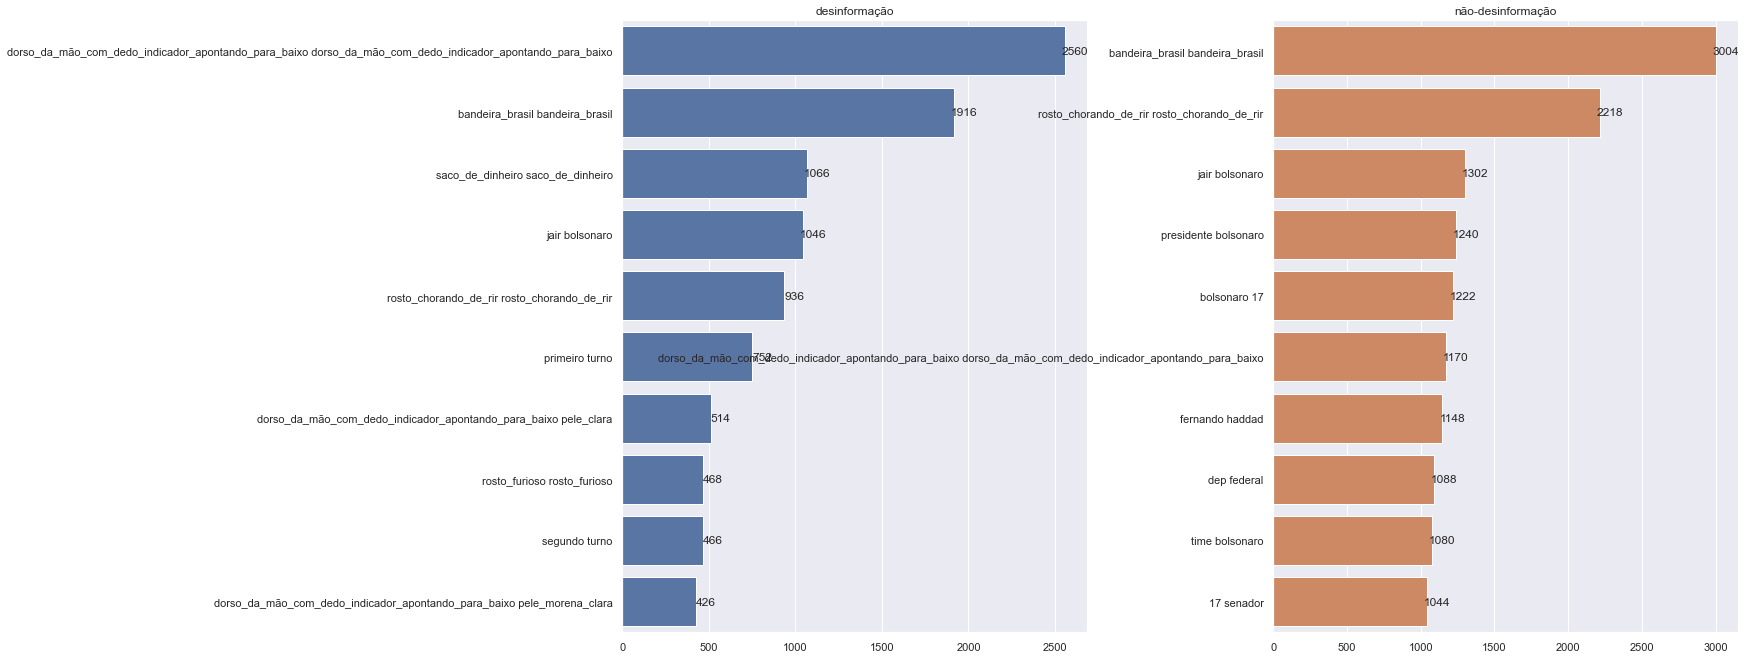

In [16]:
top_ngrams = 10
ngrams_range = (2,2)

plt.figure(figsize=(20, 10))
#plt.suptitle("10 termos frequentes", fontsize=14)

plt.subplot(121)
plt.title('desinformação')
ngrams_mis = build_ngram_df(texts_misinformation, ngram = ngrams_range, n=top_ngrams)
plotNgrams(ngrams_mis, col='C0')

plt.subplot(122)
plt.title('não-desinformação')
ngrams_non = build_ngram_df(texts_non_misinformation, ngram = ngrams_range, n=top_ngrams)
plotNgrams(ngrams_non, col='C1')

plt.subplots_adjust(left=0.125,
                    bottom=0.1, 
                    right=0.9, 
                    top=0.95, 
                    wspace=0.4, 
                    hspace=0.3)

# Timeseries

In [78]:
df.columns

Index(['id', 'date', 'hour', 'timestamp', 'ddi', 'country', 'country_iso3',
       'ddd', 'state', 'group', 'midia', 'url', 'characters', 'words', 'types',
       'viral', 'shares', 'text', 'misinformation'],
      dtype='object')

In [90]:
import plotly.express as px
import datetime
df['timestamp'] = pd.to_datetime(df['timestamp'], format='%d/%m/%y %H:%M')

In [115]:
timeseries_non_mis

,id,media móvel
timestamp,,
2018-07-02,8,NaN
2018-07-03,0,NaN
2018-07-04,0,2.666667
2018-07-05,0,0.000000
2018-07-06,0,0.000000
...,...,...
2018-10-24,196,187.333333
2018-10-25,122,163.333333
2018-10-26,220,179.333333


In [118]:
frame = '1D'
timeseries_mis = df[df['misinformation']==1].groupby('timestamp').count()['id'].resample(frame).sum().to_frame()
timeseries_mis['media móvel'] = timeseries_mis['id'].rolling(window=5).mean()


timeseries_non_mis = df[df['misinformation']==0].groupby('timestamp').count()['id'].resample(frame).sum().to_frame()
timeseries_non_mis['media móvel'] = timeseries_non_mis['id'].rolling(window=5).mean()


df_timeseries = pd.concat([timeseries_mis,timeseries_non_mis])
df_timeseries['classe'] = ['desinformação']*len(timeseries_mis) + ['não-desinformação']*len(timeseries_non_mis)
df_timeseries.reset_index(level=0, inplace=True)
df_timeseries.columns=['data','mensagens', 'média móvel','classe']
fig = px.line(df_timeseries, x='data', y='mensagens',
              color="classe", line_group="classe", hover_name="classe")
fig.show()

In [119]:
fig = px.line(df_timeseries, x='data', y='média móvel',
              color="classe", line_group="classe", hover_name="classe")
fig.show()

In [ ]:
# stuart and students
timeseries_stuart = df[df['autor_da_mensagem'] =='STUART'].groupby('timestamp').count()['remetente'].resample(frame).sum().to_frame()
timeseries_users = df[df['autor_da_mensagem'] !='STUART'].groupby('timestamp').count()['remetente'].resample(frame).sum().to_frame()
df_timeseries = pd.concat([timeseries_stuart,timeseries_users])
df_timeseries['autor'] = ['STUART']*len(timeseries_stuart) + ['USUÁRIOS']*len(timeseries_users)
df_timeseries.reset_index(level=0, inplace=True)

print('Média de mensagens enviadas pelo STUART por dia:',timeseries_stuart.mean())
print('Média de mensagens enviadas por alunos por dia:',timeseries_users.mean())

fig = px.line(df_timeseries, x='timestamp', y='remetente',
              color="autor", line_group="autor", hover_name="autor")
fig.show()

# Network

In [21]:
from pyvis.network import Network


In [50]:
sample = pd.Series(df['id'].unique()).sample(2000).values
df_sample = df[df.apply(lambda x: x['id'] in sample, axis = 1)]  

In [51]:
def create_network(network_file, df):
    net = Network(width = '1800px', height = '1000px', notebook = True, directed=False)
    users = list(df['id'].unique())
    print('number of users: ', len(users))
    print('maximum number of interactions: ', len(users)**2)
    added_nodes = []
    added_edges = []
    s = 8
    for i, user in enumerate(users):
        if i%50==0:
            print('{} users processed'.format(i))
        df_user = df[df['id']==user]
        groups = df_user['group'].unique()
        for group in groups:
            users_in_group = df[df['group']==group]['id'].unique()
            for user_in_group in users_in_group:
                if (user,user_in_group) in added_edges or (user_in_group,user) in added_edges or user_in_group==user:
                    continue
                if user_in_group not in added_nodes:
                    net.add_node(int(user_in_group), size = s, label = ' ')
                    added_nodes.append(user_in_group)
                if user not in added_nodes:
                    net.add_node(int(user), size = s, label = ' ')
                    added_nodes.append(user)
                net.add_edge(int(user), int(user_in_group))
                added_edges.append((user,user_in_group))

    net.save_graph(network_file)
    return net
#net.show(network_file)            

In [52]:
net = create_network('users_network_samples.html', df_sample)
net

number of users:  2000
maximum number of interactions:  4000000
0 users processed
50 users processed
100 users processed
150 users processed
200 users processed
250 users processed
300 users processed
350 users processed
400 users processed
450 users processed
500 users processed
550 users processed
600 users processed
650 users processed
700 users processed
750 users processed
800 users processed
850 users processed
900 users processed
950 users processed
1000 users processed
1050 users processed
1100 users processed
1150 users processed
1200 users processed
1250 users processed
1300 users processed
1350 users processed
1400 users processed
1450 users processed
1500 users processed
1550 users processed
1600 users processed
1650 users processed
1700 users processed
1750 users processed
1800 users processed
1850 users processed
1900 users processed
1950 users processed


<class 'pyvis.network.Network'> |N|=2000 |E|=79,346

In [65]:
net = Network(width = '1800px', height = '1000px', notebook = True, directed=False)
added_nodes = []
added_edges = []
s = 5
groups = list(df['group'].unique())
for i in groups:
    users_in_i = df[df['group']==i]['id'].unique()
    for j in groups:
        if (i,j) in added_edges or (j,i) in added_edges or i==j:
            continue
        if i not in added_nodes:
            net.add_node(i,value=s, label=' ', title=i)
            added_nodes.append(i)
        if j not in added_nodes:
            net.add_node(j,size=s, label=' ', title=j) 
            added_nodes.append(j)
        users_in_j = df[df['group']==j]['id'].unique()
        if set(users_in_i).intersection(set(users_in_j)):
            net.add_edge(i, j)
            

In [67]:
# network_file = 'groups_graph.html'
# net.save_graph(network_file)
# net.show(network_file)

In [58]:
# virals
users = list(df['id'].unique())
print('number of users: ', len(users))
print('maximum number of interactions: ', len(users)**2)
added_nodes = []
added_edges = []
for i, user in enumerate(users):
    if i%50==0:
        print('{} users processed'.format(i))
    df_user = df[df['id']==user]
    groups = df_user[df_user['viral']==1]['group'].unique()
    for group in groups:
        users_in_group = df[df['group']==group]['id'].unique()
        for user_in_group in users_in_group:
            if (user,user_in_group) in added_edges or user_in_group==user:
                continue
            if user_in_group not in added_nodes:
                added_nodes.append(user_in_group)
            if user not in added_nodes:
                added_nodes.append(user)
            added_edges.append((user,user_in_group))
            
print('viral network')             
print('nodes',len(added_nodes))
print('edges',len(added_edges))

number of users:  5364
maximum number of interactions:  28772496
0 users processed
50 users processed
100 users processed
150 users processed
200 users processed
250 users processed
300 users processed
350 users processed
400 users processed
450 users processed
500 users processed
550 users processed
600 users processed
650 users processed
700 users processed
750 users processed
800 users processed
850 users processed
900 users processed
950 users processed
1000 users processed
1050 users processed
1100 users processed
1150 users processed
1200 users processed
1250 users processed
1300 users processed
1350 users processed
1400 users processed
1450 users processed
1500 users processed
1550 users processed
1600 users processed
1650 users processed
1700 users processed
1750 users processed
1800 users processed
1850 users processed
1900 users processed
1950 users processed
2000 users processed
2050 users processed
2100 users processed
2150 users processed
2200 users processed
2250 users pr

In [59]:
# misinformation
users = list(df['id'].unique())
print('number of users: ', len(users))
print('maximum number of interactions: ', len(users)**2)
added_nodes = []
added_edges = []
for i, user in enumerate(users):
    if i%100==0:
        print('{} users processed'.format(i))
    df_user = df[df['id']==user]
    groups = df_user[df_user['misinformation']==1]['group'].unique()
    for group in groups:
        users_in_group = df[df['group']==group]['id'].unique()
        for user_in_group in users_in_group:
            if (user,user_in_group) in added_edges or user_in_group==user:
                continue
            if user_in_group not in added_nodes:
                added_nodes.append(user_in_group)
            if user not in added_nodes:
                added_nodes.append(user)
            added_edges.append((user,user_in_group))
            
print('misinformation network')             
print('nodes',len(added_nodes))
print('edges',len(added_edges))

number of users:  5364
maximum number of interactions:  28772496
0 users processed
50 users processed
100 users processed
150 users processed
200 users processed
250 users processed
300 users processed
350 users processed
400 users processed
450 users processed
500 users processed
550 users processed
600 users processed
650 users processed
700 users processed
750 users processed
800 users processed
850 users processed
900 users processed
950 users processed
1000 users processed
1050 users processed
1100 users processed
1150 users processed
1200 users processed
1250 users processed
1300 users processed
1350 users processed
1400 users processed
1450 users processed
1500 users processed
1550 users processed
1600 users processed
1650 users processed
1700 users processed
1750 users processed
1800 users processed
1850 users processed
1900 users processed
1950 users processed
2000 users processed
2050 users processed
2100 users processed
2150 users processed
2200 users processed
2250 users pr

In [10]:
# messages network
users = list(df['id'].unique())
print('number of users: ', len(users))
print('maximum number of interactions: ', len(users)**2)
#added_nodes = []
#added_edges = []
for i, user in enumerate(users):
    if i%100==0:
        print('{} users processed'.format(i))
    df_user = df[df['id']==user]
    groups = df_user['group'].unique()
    for group in groups:
        users_in_group = df[df['group']==group]['id'].unique()
        for user_in_group in users_in_group:
            if (user,user_in_group) in added_edges or user_in_group==user:
                continue
            if user_in_group not in added_nodes:
                added_nodes.append(user_in_group)
            if user not in added_nodes:
                added_nodes.append(user)
            added_edges.append((user,user_in_group))
            
print('messages network')             
print('nodes',len(added_nodes))
print('edges',len(added_edges))

number of users:  5364
maximum number of interactions:  28772496
0 users processed
100 users processed
200 users processed
300 users processed
400 users processed
500 users processed
600 users processed
700 users processed
800 users processed
900 users processed
1000 users processed
1100 users processed
1200 users processed
1300 users processed
1400 users processed
1500 users processed
1600 users processed
1700 users processed
1800 users processed
1900 users processed
2000 users processed
2100 users processed
2200 users processed
2300 users processed
2400 users processed
2500 users processed
2600 users processed
2700 users processed
2800 users processed
2900 users processed
3000 users processed
3100 users processed
3200 users processed
3300 users processed
3400 users processed
3500 users processed
3600 users processed
3700 users processed
3800 users processed
3900 users processed
4000 users processed
4100 users processed
4200 users processed
4300 users processed
4400 users processed
45

In [11]:
print('nodes',len(added_nodes))
print('edges',len(added_edges))

nodes 5364
edges 1125326


In [6]:
import pickle
#pickle.dump(added_nodes, open( "nodes.p", "wb" ))
#pickle.dump(added_edges, open( "edges.p", "wb" ))

In [9]:
with open("edges.p", 'rb') as handle:
    added_edges = pickle.load(handle)
    
with open("nodes.p", 'rb') as handle:
    added_nodes = pickle.load(handle)